In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Assume you have a pandas DataFrame `df` with 'date' and 'value' columns.
df = pd.read_csv("AirPassengers(ex3).csv", parse_dates= True, index_col='Month')

In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


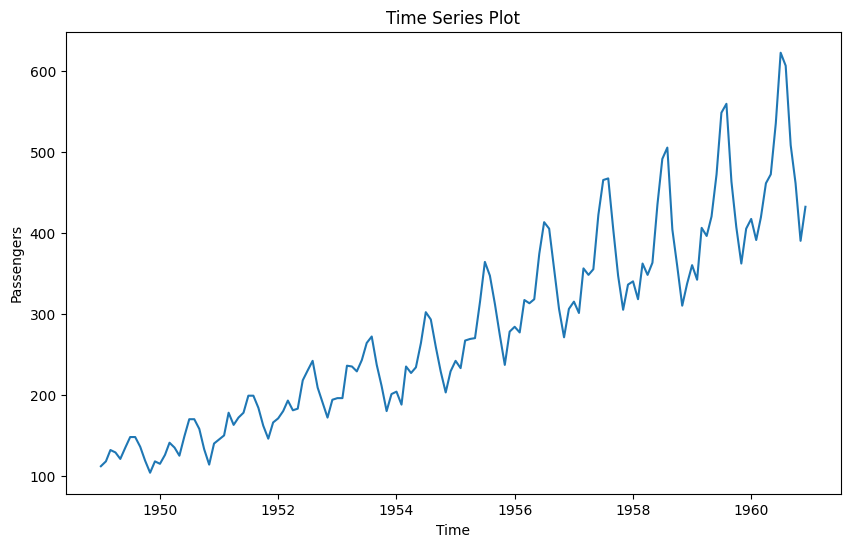

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['#Passengers'])
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:

# Perform Augmented Dickey-Fuller Test
result = adfuller(df['#Passengers'])

In [ ]:

# Extract the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

In [ ]:

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"Critical Values: {critical_values}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [ ]:
if p_value < 0.05:
    print("The time series is stationary (Reject null hypothesis).")
else:
    print("The time series is non-stationary (Fail to reject null hypothesis).")

The time series is non-stationary (Fail to reject null hypothesis).


In [ ]:
df['diff'] = df['#Passengers'].diff().dropna()

In [ ]:
df['diff']

,diff
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
a = 0
# Iterate through the 'diff' column
for i in df['diff']:
    if pd.isna(i):  # Check if the value is NaN
        print(i)      # Optionally print the NaN values
        a += 1        # Increment the counter for NaN values
print(a)  # Print the total number of NaN values

nan
1


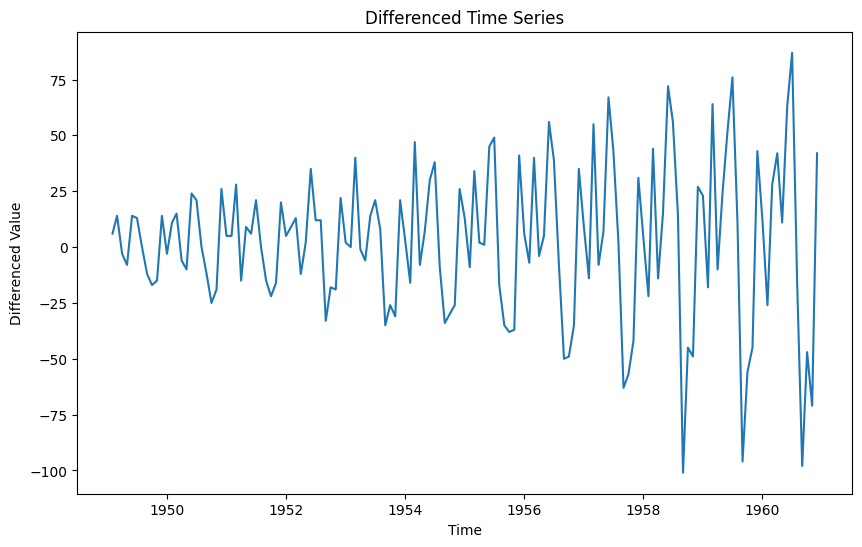

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['diff'])
plt.title("Differenced Time Series")
plt.xlabel("Time")
plt.ylabel("Differenced Value")
plt.show()

In [ ]:
result_diff = adfuller(df['diff'].dropna())
print(f"ADF Statistic: {result_diff[0]}")
print(f"p-value: {result_diff[1]}")

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [ ]:
if p_value < 0.05:
    print("The time series is stationary (Reject null hypothesis).")
else:
    print("The time series is non-stationary (Fail to reject null hypothesis).")

The time series is non-stationary (Fail to reject null hypothesis).
